# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [2]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [3]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [4]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [5]:
linear = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
y_predict = X_test.dot(linear)

In [6]:
X_train.T.dot(X_train)

array([[425.08417508]])

In [7]:
y_predict

array([-49.37863951, -47.34240696, -45.3061744 , -43.26994184,
       -41.23370928, -39.19747673, -37.16124417, -35.12501161,
       -33.08877906, -31.0525465 , -29.01631394, -26.98008138,
       -24.94384883, -22.90761627, -20.87138371, -18.83515115,
       -16.7989186 , -14.76268604, -12.72645348, -10.69022093,
        -8.65398837,  -6.61775581,  -4.58152325,  -2.5452907 ,
        -0.50905814,   1.52717442,   3.56340698,   5.59963953,
         7.63587209,   9.67210465,  11.7083372 ,  13.74456976,
        15.78080232,  17.81703488,  19.85326743,  21.88949999,
        23.92573255,  25.96196511,  27.99819766,  30.03443022,
        32.07066278,  34.10689533,  36.14312789,  38.17936045,
        40.21559301,  42.25182556,  44.28805812,  46.32429068,
        48.36052324,  50.39675579])

In [8]:
def mae(predicted, real):
    return np.sum(np.absolute(predicted-real)) / len(predicted)

In [9]:
mae(y_predict, y_test)

8.520870546839504

In [10]:
def mse(predicted, real):
    return np.sum((predicted-real)**2) / len(predicted)

In [11]:
mse(y_predict, y_test)

107.39420390864703

### Проверим правильность

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_predict)

8.520870546839504

In [13]:
mean_squared_error(y_test, y_predict)

107.39420390864703

И MSE, и MAE совпадают

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [14]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [15]:
data

{'support': array([0.        , 0.00628947, 0.01257895, 0.01886842, 0.0251579 ,
        0.03144737, 0.03773685, 0.04402632, 0.0503158 , 0.05660527,
        0.06289475, 0.06918422, 0.0754737 , 0.08176317, 0.08805265,
        0.09434212, 0.1006316 , 0.10692107, 0.11321055, 0.11950002,
        0.1257895 , 0.13207897, 0.13836845, 0.14465792, 0.15094739,
        0.15723687, 0.16352634, 0.16981582, 0.17610529, 0.18239477,
        0.18868424, 0.19497372, 0.20126319, 0.20755267, 0.21384214,
        0.22013162, 0.22642109, 0.23271057, 0.23900004, 0.24528952,
        0.25157899, 0.25786847, 0.26415794, 0.27044742, 0.27673689,
        0.28302637, 0.28931584, 0.29560531, 0.30189479, 0.30818426,
        0.31447374, 0.32076321, 0.32705269, 0.33334216, 0.33963164,
        0.34592111, 0.35221059, 0.35850006, 0.36478954, 0.37107901,
        0.37736849, 0.38365796, 0.38994744, 0.39623691, 0.40252639,
        0.40881586, 0.41510534, 0.42139481, 0.42768429, 0.43397376,
        0.44026323, 0.44655271, 0.452

In [16]:
len(data['x_train'][175:])

75

In [17]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [18]:
wave_x_train = data['x_train'].reshape(-1, 1)
wave_y_train = data['y_train'].reshape(-1, 1)
wave_x_test = data['x_train'][175:].reshape(-1, 1)
wave_y_test = data['y_train'][175:].reshape(-1, 1)

linear = np.linalg.inv(wave_x_train.T.dot(wave_x_train)).dot(wave_x_train.T).dot(wave_y_train)
wave_y_predict = wave_x_test.dot(linear)

In [19]:
mae(wave_y_predict, wave_y_test)

0.48834916082184304

In [20]:
mse(wave_y_predict, wave_y_test)

0.3398293932189575

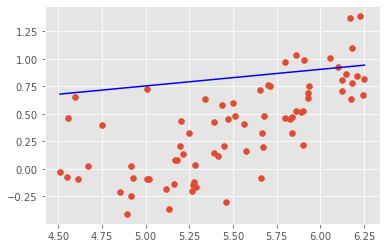

In [26]:
plt.scatter(wave_x_test, wave_y_test)
plt.plot(wave_x_test, wave_y_predict, c='b')

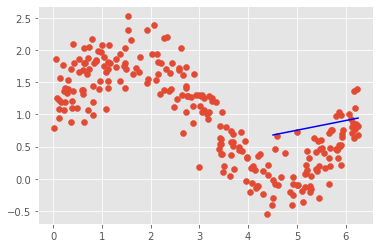

In [27]:
plt.scatter(wave_x_train, wave_y_train)
plt.plot(wave_x_test, wave_y_predict, c='b')

In [28]:
wave_new_y_predict = wave_x_train.dot(linear)

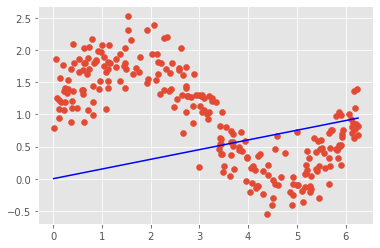

In [29]:
plt.scatter(wave_x_train, wave_y_train)
plt.plot(wave_x_train, wave_new_y_predict, c='b')

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

In [43]:
degrees = [1, 2, 4, 8]

## График на 75 объектах
График для всех объектов ниже

---
mse for degree=1: 0.2695231954482557
---
mse for degree=2: 0.24014637445031298
---
mse for degree=4: 0.08038680504803213
---
mse for degree=8: 0.07386848390231181
---


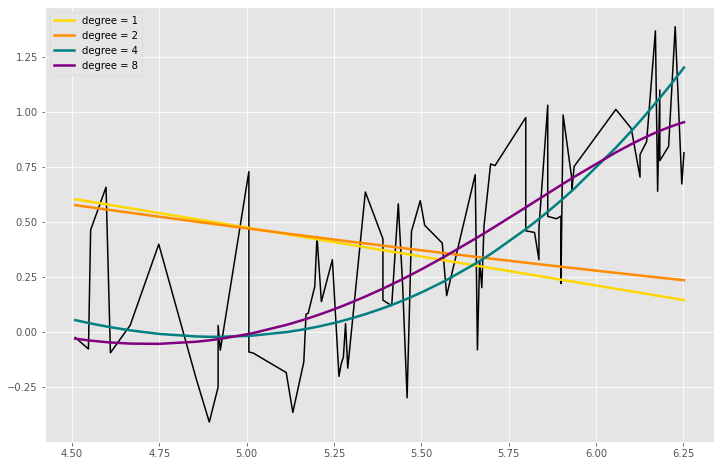

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.set_prop_cycle(color=[
    "black", "gold", "darkorange", "teal", "purple"
])

# ax.scatter(wave_x_test, wave_y_test, label="training points")
ax.plot(wave_x_train[175:], wave_y_train[175:])

for degree in degrees:
    poly = PolynomialFeatures(degree)
    
    X_poly = poly.fit_transform(wave_x_train) # X_train
    X_test_poly = poly.fit_transform(wave_x_test) # X_test
    
    linear = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(wave_y_train) # coeffs
    predicted = X_test_poly.dot(linear) # y_predicted
    
#     fig, ax = plt.subplots()
#     ax.scatter(wave_x_test, wave_y_test, label="training points")
    ax.plot(wave_x_test, predicted, label=f'degree = {degree}', linewidth=2.5)
    ax.legend(loc='upper left')
    
    print('---')
    print(f'mse for degree={degree}:', mse(predicted, wave_y_test))
print('---')
plt.show()

## График для всех

---
mse for degree=1: 0.2484638315680986
---
mse for degree=2: 0.24630420562794592
---
mse for degree=4: 0.0929883484901774
---
mse for degree=8: 0.08545950245741807
---


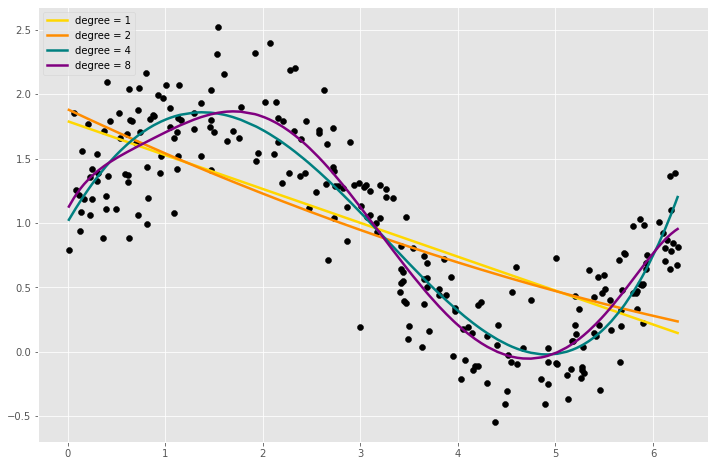

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.set_prop_cycle(color=[
    "gold", "darkorange", "teal", "purple"
])

# ax.scatter(wave_x_test, wave_y_test, label="training points")
ax.scatter(wave_x_train, wave_y_train, c='black')

for degree in degrees:
    poly = PolynomialFeatures(degree)
    
    X_poly = poly.fit_transform(wave_x_train) # X_train
#     X_test_poly = poly.fit_transform(wave_x_test) # X_test
    
    linear = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(wave_y_train) # coeffs
    predicted = X_poly.dot(linear) # y_predicted
    
#     fig, ax = plt.subplots()
#     ax.scatter(wave_x_test, wave_y_test, label="training points")
    ax.plot(wave_x_train, predicted, label=f'degree = {degree}', linewidth=2.5)
    ax.legend(loc='upper left')
    
    print('---')
    print(f'mse for degree={degree}:', mse(predicted, wave_y_train))
print('---')
plt.show()

Из графика видно, что чем выше степень полинома, тем лучше он "подстраивается под исходные данные". Полиному степени 1 и 2 работают совсем плохо, перелом начинается со степени 3

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [2]:
from sklearn.datasets import load_boston

In [3]:
house_data = load_boston()

## Задание 3.4

In [4]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [5]:
X = house_data['data']

In [6]:
y = house_data['target']

In [7]:
X.shape

(506, 13)

In [17]:
y.shape

(506,)

In [23]:
linear = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_predicted = X.dot(linear)

MAE и MSE для полного датасета

In [26]:
mae(y_predicted, y)

3.286733578961501

In [27]:
mse(y_predicted, y)

24.166099330126492

Оставляем только 7 самых значимых признаков

In [30]:
linear

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [36]:
weights = {k:abs(v) for k,v in enumerate(linear)}

In [37]:
weights

{0: 0.09289651702763595,
 1: 0.04871495518297768,
 2: 0.004059979575018756,
 3: 2.8539988199939637,
 4: 2.868436370414039,
 5: 5.92814777905301,
 6: 0.007269334576056671,
 7: 0.9685141573949353,
 8: 0.1711511282943938,
 9: 0.009396215397158146,
 10: 0.3921909262950195,
 11: 0.014905610228202859,
 12: 0.41630447073743476}

In [47]:
weights = dict(sorted(weights.items(), key=lambda item: item[1], reverse=True))

In [51]:
weights

{5: 5.92814777905301,
 4: 2.868436370414039,
 3: 2.8539988199939637,
 7: 0.9685141573949353,
 12: 0.41630447073743476,
 10: 0.3921909262950195,
 8: 0.1711511282943938,
 0: 0.09289651702763595,
 1: 0.04871495518297768,
 11: 0.014905610228202859,
 9: 0.009396215397158146,
 6: 0.007269334576056671,
 2: 0.004059979575018756}

In [46]:
features = house_data['feature_names']

In [49]:
key_features = []
for ind in list(weights.keys())[:7]:
    key_features.append(features[ind])

In [50]:
key_features

['RM', 'NOX', 'CHAS', 'DIS', 'LSTAT', 'PTRATIO', 'RAD']

In [57]:
df = pd.DataFrame(house_data.data, columns=house_data.feature_names)
df['target'] = pd.Series(house_data.target)

In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
useless_cols = [i for i in df.columns if i not in key_features]

In [60]:
X_cropped = pd.DataFrame(df.drop(useless_cols, axis=1))

In [61]:
y_cropped = df['target']

In [62]:
linear = np.linalg.inv(X_cropped.T.dot(X_cropped)).dot(X_cropped.T).dot(y_cropped)
y_cropped_pred = X_cropped.dot(linear)

In [63]:
mae(y_cropped_pred, y_cropped)

3.515697155235243

In [64]:
mse(y_cropped_pred, y_cropped)

26.95952200616484

Результаты слегка хуже, чем у полного датасета. Там было MAE = 3.2867 и MSE = 24.1661